Taller 2

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy import integrate

Derivación

8

Raíces de Polinomios

5

In [2]:
x = sym.Symbol('x',real=True)
y = sym.Symbol('y',real=True)
n = 19



In [3]:
def GetLaguerre(n,x,y):
    
    y= ((1/(np.e**(x)))*(x**n))
    
    poly = ((np.e**x)*sym.diff( y,x,n ))/(np.math.factorial(n))
    
    return poly

In [4]:
Laguerre = []
DLaguerre = []

for i in range(n+1):
    
    Poly = GetLaguerre(i,x,y)
    Laguerre.append(Poly)
    DLaguerre.append( sym.diff(Poly,x,1) )

In [5]:
len(DLaguerre)

20

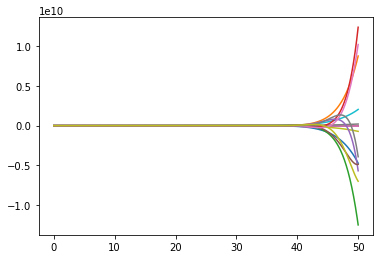

In [6]:
_x=np.linspace(0,50,1000)

for i, p in enumerate(Laguerre):
    if i!= 0:
        pn = sym.lambdify([x],p,'numpy')
        plt.plot(_x,pn(_x))

In [7]:
def GetNewton(f,df,xn,itmax=10000,precision=1e-14):
    
    error = 1.
    it = 0
    
    while error >= precision and it < itmax:
        
        try:
            
            xn1 = xn - f(xn)/df(xn)
            
            error = np.abs(f(xn)/df(xn))
            
        except ZeroDivisionError:
            print('Zero Division')
            
        xn = xn1
        it += 1
        
    if it == itmax:
        return False
    else:
        return xn

In [8]:
def GetRoots(f,df,x,tolerancia = 14):
    
    Roots = np.array([])
    
    for i in x:
        
        root = GetNewton(f,df,i)
        
        if root != False:
            
            croot = np.round( root, tolerancia )
            
            if croot not in Roots:
                Roots = np.append(Roots, croot)
                
    Roots.sort()
    
    return Roots

In [9]:
def GetAllRoots(n,xn,Laguerre,DLaguerre):
    
    poly = sym.lambdify([x],Laguerre[n],'numpy')
    Dpoly = sym.lambdify([x],DLaguerre[n],'numpy')
    Roots = GetRoots(poly,Dpoly,xn)
    
    return Roots

In [ ]:
xn = np.linspace(0,50,1000)
Roots = GetAllRoots(n,xn,Laguerre,DLaguerre)

Lagrange

1

Sean $C_{0},C_{1},...,C_{n-1}$ los coeficientes del polinomio interpolador $p(x_{i})$ de modo que,
$p(x_{i})=C_{0}+C_{1}x_{i},C_{2}x_{i}^2+...+C_{n-1}x_{i}^{n-1}$ 

Entonces, se puede reescribir en su forma matricial como:

$$\begin{Bmatrix}
1 & + & x_{0} & + & x_{0}^2 & + & \cdots & + & x_{0}^n & = & y_{1}\\
1 & + & x_{1} & + & x_{1}^2 & + & \cdots & + & x_{1}^n & = & y_{1}\\
 \vdots & \vdots  &  \vdots & \vdots  &  \vdots & \vdots & \vdots & \vdots  & \vdots & \vdots  & \vdots  \\
1 & + & x_{n} & + & x_{n}^2 &  + & \cdots & + & x_{n}^n & = & y_{1}
\end{Bmatrix}$$


Obteniendo un sistema de ecuaciones lineales, de la forma:

$$\begin{pmatrix}
1 & x_{0} & x_{0}^2 & \cdots & x_{0}^n\\
1 & x_{1} & x_{1}^2 & \cdots & x_{1}^n\\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{n} & x_{n}^2 & \cdots & x_{n}^n
\end{pmatrix}
\begin{pmatrix}
C_{0} \\
C_{1} \\
\vdots \\
C_{n}
\end{pmatrix}
=
\begin{pmatrix}
f(x_{0}) \\
f(x_{1}) \\
\vdots \\
f(x_{n})
\end{pmatrix}$$


De modo que el determinante de esta matrix cumple con la ecuación:

$\prod_{0\leqq i<j\leqq n}(x_{j}-x_{i})$

Este da distinto de cero si para todo $i,j$ , $x_{i}\neq x_{j}$

Esto implica que el sistema tiene una única solución y por ende el polinomio interpolador generado por la Interpolación de Lagrange es único.


4

In [2]:
def cargar(nombre:str)->tuple:
    archivo=open(nombre,mode='r',encoding=("utf8"))
    llaves=archivo.readline().strip()
    linea=archivo.readline().strip()
    y=[]
    x=[]
    
    while len(linea)>0:
        datos=linea.split(",")
        datos[0]
        x.append(float(datos[0]))
        y.append(float(datos[1]))
          
        linea=archivo.readline()
        
    archivo.close()

    return  (x,y)

In [6]:
X,Y=cargar('Parabolico.txt')
X,Y

([1.4, 3.5, 5.6], [0.4007954931819738, 0.594128102489774, 0.29802795523938164])

In [4]:
def Lagrange(x,xi,j):
    
    prod = 1.0
    n = len(xi)
    
    for i in range(n):
        if i != j:
            prod *= (x - xi[i])/(xi[j]-xi[i])
            
    return prod

In [5]:
def Interpolate(x,xi,yi):
    
    Sum = 0.
    n = len(xi)
    
    for j in range(n):
        Sum += yi[j]*Lagrange(x,xi,j)
        
    return Sum

In [25]:
x = np.linspace(X[0],X[-1],100)
y = Interpolate(x,X,Y)

In [27]:
x_symb = sym.Symbol('x',real=True)

f=Interpolate(x_symb,X,Y)
f_sym = sym.simplify(f)
f_sym

x*(0.363970234266202 - 0.0554912422401579*x)

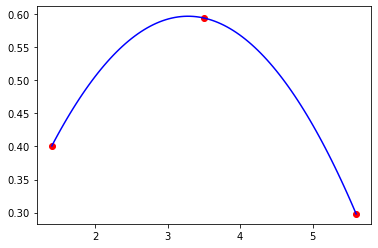

In [19]:
plt.scatter(X,Y,marker='o',color='red')
plt.plot(x,y,color='blue')


In [51]:
def function(x):
    return x*0.363970234266202 -0.0554912422401579*(x**2)


In [52]:
def Angle():
    x_1=1.4
    x_2=1.4+1e-4
    dif= function(x_2)-function(x_1)
    tan= np.arctan(dif/(1e-4))
    
    return tan

ang=int(Angle()*100)
ang

20

In [53]:
def GetSpeed(Y_f,Y_o,Theta,X_f,X_o,g=-9.8):
    vel=(g*((X_f-X_o)**2)/((2*np.cos(Theta)**2)*(Y_f-Y_o-(np.tan(Theta)*(X_f-X_o)))))**(1/2)
    return vel

speed=GetSpeed(0.29802795523938164,0.4007954931819738,ang,5.6,1.4)
speed
    

7.392042570975572

5

Integración 

1

3

7

13 

17